## Séries Temporais:

***

### Sobre os datasets das práticas:

### 1. Alucar:

* Dataset utilizado pelo Alura no curso de Estatística sobre Séries Temporais.
* Contém as variáveis:

> Data de venda ('mes')

> Número de vendas ('vendas')

#### Os dados do dataset 'Alucar' referem-se às vendas realizadas mensalmente no período de 2 anos.

***

In [2]:
!pip install pandas

     |████████████████████████████████| 11.5 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 15.8 MB 4.7 MB/s eta 0:00:01


In [4]:
!pip install seaborn

     |████████████████████████████████| 292 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 6.2 MB/s eta 0:00:01


In [5]:
# Importação de bibliotecas:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
# Leitura dos dados:

alucar = pd.read_csv('data/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### Análise Exploratória dos dados:

In [7]:
# Tamanho do dataset:

alucar.shape

(24, 2)

In [8]:
# Verificando a existência / quantidade de dados nulos:

alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [9]:
# Verificando os tipos de dados:

alucar.dtypes

mes       object
vendas     int64
dtype: object

#### Para trabalharmos com séries tmporais, é importante que os dados referentes às datas estejam no formato date-time.

In [10]:
# Convertendo os dados da variável 'mes':

alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

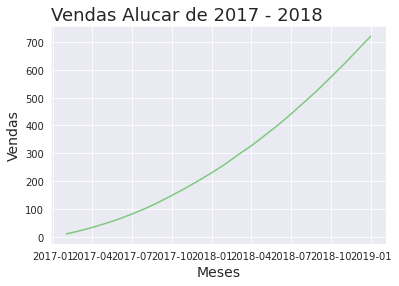

In [11]:
# Gráfico das vendas por mês:

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = alucar['mes'], y = alucar['vendas'], data = alucar)
ax.set_title('Vendas Alucar de 2017 - 2018', loc = 'left', fontsize=18)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('Vendas', fontsize = 14)
ax = ax

In [12]:
# Decompondo as vendas:

# Diferença do mês seguinte para o mês anterior

alucar['Aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,Aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


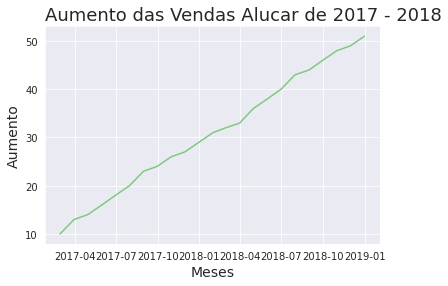

In [13]:
# Gráfico:

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = alucar['mes'], y = alucar['Aumento'], data = alucar)
ax.set_title('Aumento das Vendas Alucar de 2017 - 2018', loc = 'left', fontsize=18)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [14]:
# Função para criação do gráfico:

def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y=y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize=18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

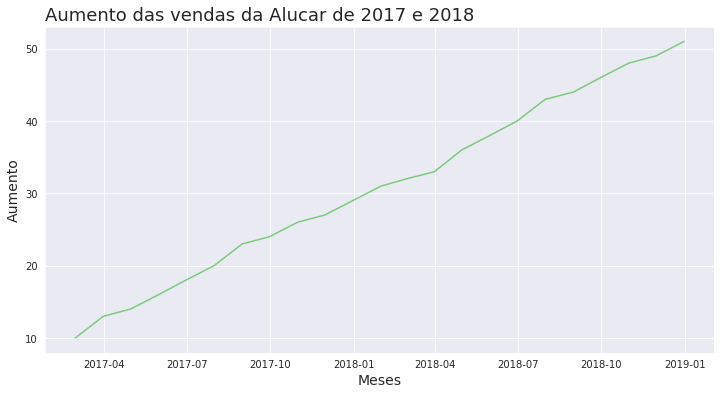

In [15]:
# Utilizando as funções:

plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Meses','Aumento',
      'mes', 'Aumento', alucar)

In [16]:
# Velocidade de crescimento

alucar['aceleracao'] = alucar['Aumento'].diff()
alucar.head()

,mes,vendas,Aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


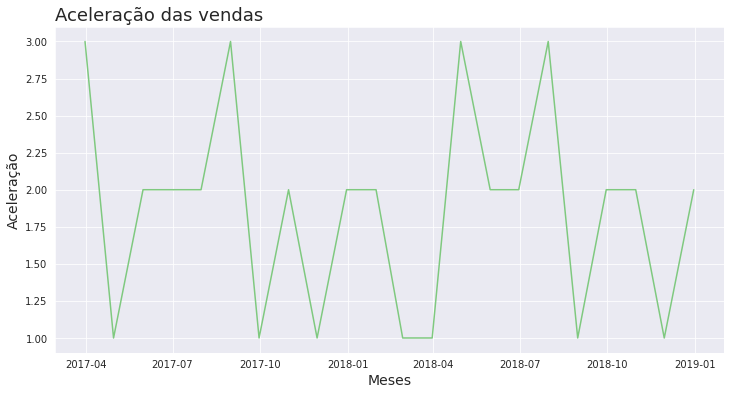

In [17]:
# Grafico:

plotar('Aceleração das vendas', 'Meses', 'Aceleração', 
       'mes', 'aceleracao', alucar)

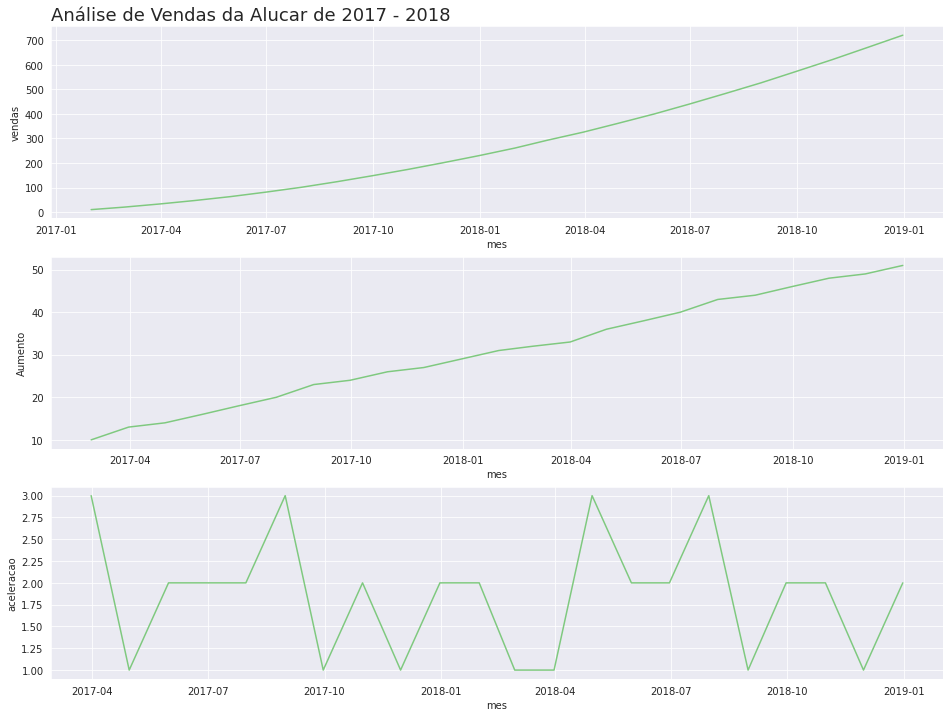

In [18]:
# Juntando os gráficos:

plt.figure(figsize = (16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de Vendas da Alucar de 2017 - 2018', fontsize = 18, loc = 'left')
sns.lineplot(x='mes', y='vendas', data=alucar)
ax = plt.subplot(3,1,2)
sns.lineplot(x='mes', y='Aumento', data=alucar)
ax = plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [19]:
# Função para criar 3 gráficos juntos:

def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x=x, y=y1, data=dataset)
    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

In [20]:
# Análise de Autocorrelação:

from pandas.plotting import autocorrelation_plot

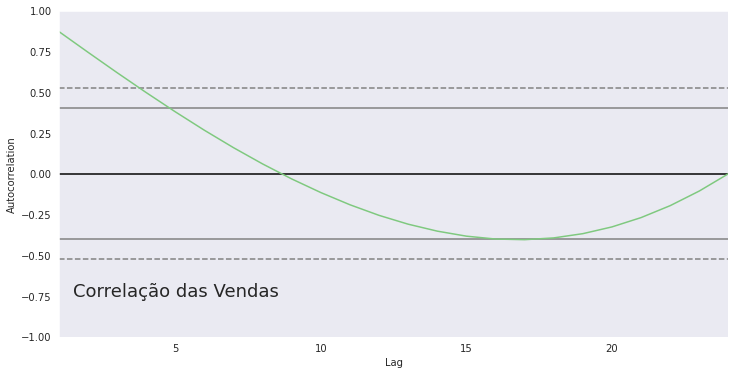

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26,y=0.25)
autocorrelation_plot(alucar['vendas'])
ax = ax

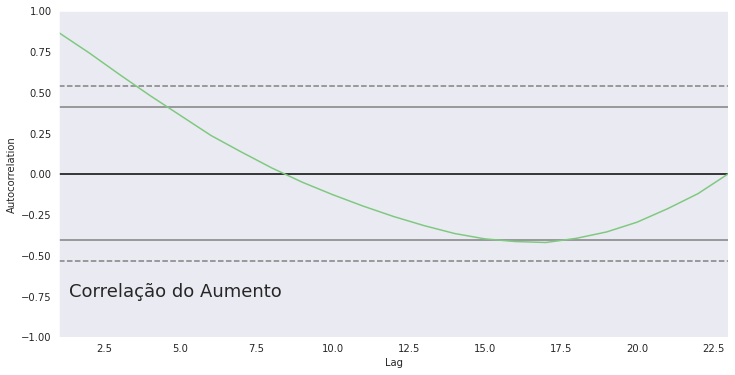

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26,y=0.25)
autocorrelation_plot(alucar['Aumento'][1:])
ax = ax

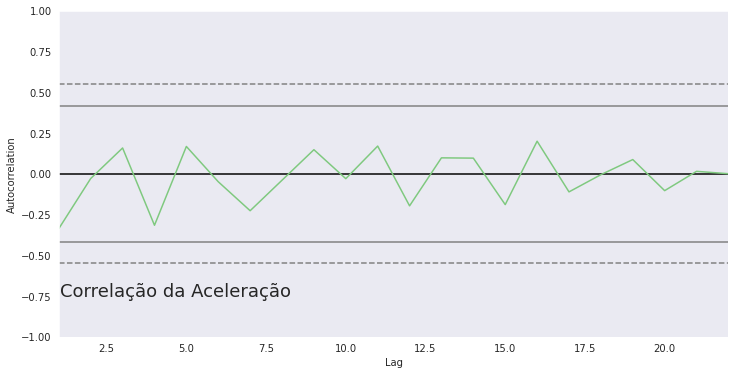

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração', fontsize=18, x=0.26,y=0.25)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

#

## Assinantes da newsletter da Alucar:

In [24]:
# Importação do dataset:

assinantes = pd.read_csv('data/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [25]:
# Verificação do tipo dos dados:

assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [26]:
# Alteração do tipo dos dados de data:

assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [27]:
# Verificando o tamanho do dataset e a quantidade de dados nulos:

print(f'Tamanho do dataset: {assinantes.shape}')
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')

Tamanho do dataset: (24, 2)
Quantidade de dados nulos: 0


In [28]:
# Decomposição da variável 'assinantes' em 'aumento' e 'aceleracao':

assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [29]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


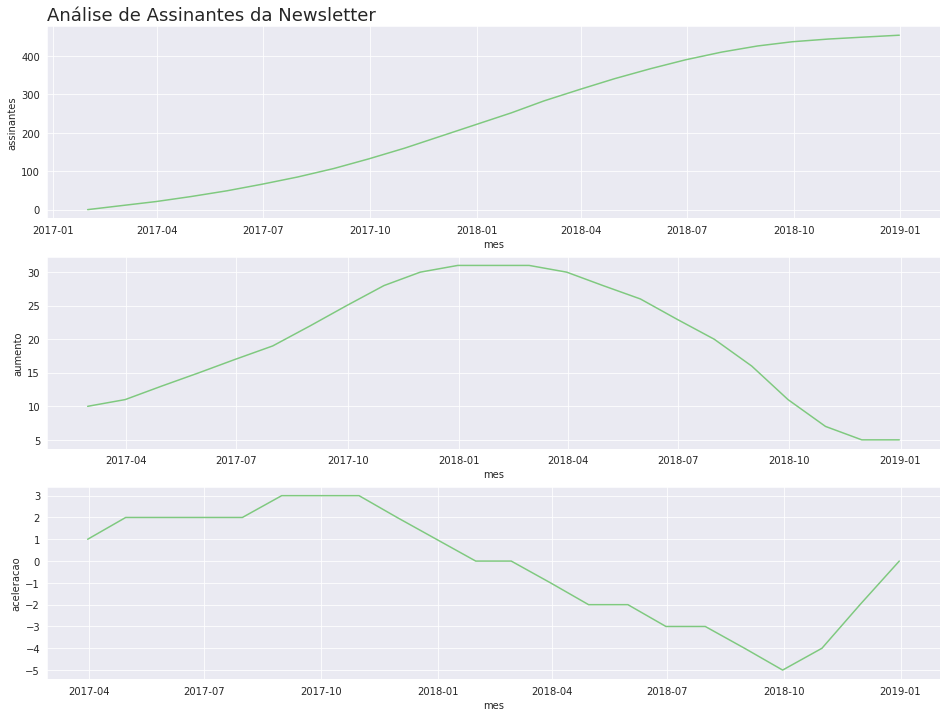

In [30]:
# Plotando os gráficos de comparação:

plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao',assinantes,'Análise de Assinantes da Newsletter')

## Analisando as vendas -  Dataset CHOCOLURA:

In [31]:
# Importação dos dados:

chocolura = pd.read_csv('data/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [32]:
#Verificando os tipos de dados:

chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [33]:
# Alterando os dados:

chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [34]:
# Verificando o tamanho do dataset e a quantidade de dados nulos:

print(f'Tamanho do dataset: {chocolura.shape}')
print(f'Quantidade de dados nulos: {chocolura.isna().sum().sum()}')

Tamanho do dataset: (24, 2)
Quantidade de dados nulos: 0


In [35]:
# Decompondo a variável vendas em aumento e aceleração:

chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

In [36]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


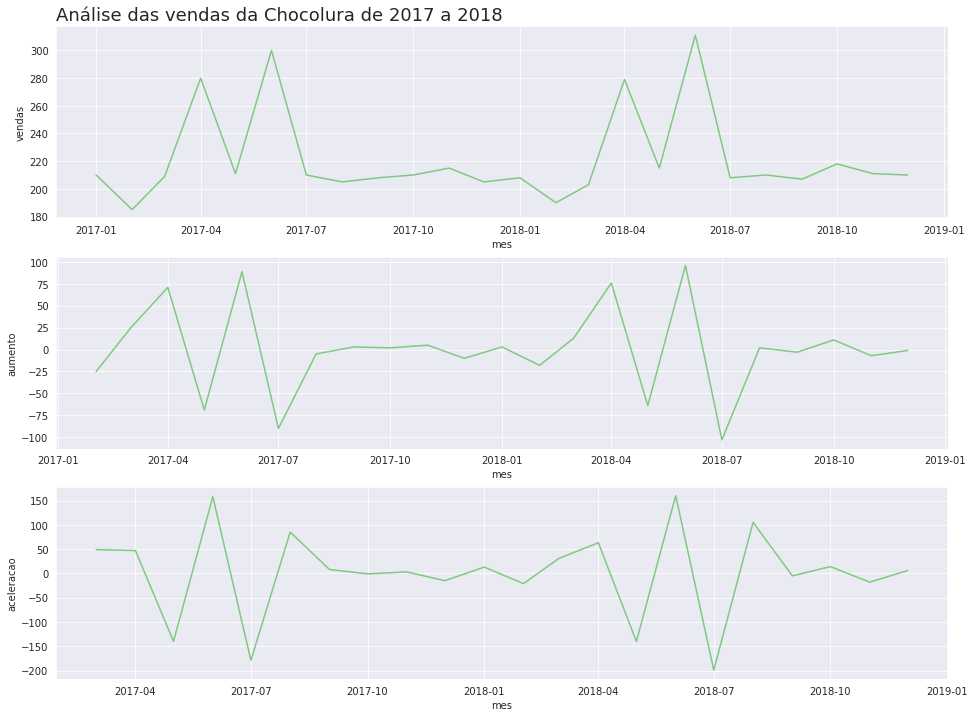

In [37]:
# Plot de comparação:

plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',chocolura, 'Análise das vendas da Chocolura de 2017 a 2018')

#### Nota-se um comportamento sazonal nos dados: Aumento repetitivo dentro de um mesmo período (Páscoa e dia dos Namorados)

#

### Chocolura - Vendas diárias (outubro e novembro): dataset vendas_por_dia

In [39]:
# Importação do dataset:

vendas_por_dia = pd.read_csv('data/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [40]:
# Tipos de dados:

vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [41]:
# Verificando o tamanho do dataset e a quantidade de dados nulos:

print(f'Tamanho do dataset: {vendas_por_dia.shape}')
print(f'Quantidade de dados nulos: {vendas_por_dia.isna().sum().sum()}')

Tamanho do dataset: (61, 2)
Quantidade de dados nulos: 0


In [42]:
# Convertendo o tipo:

vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [43]:
# Decompondo a variavel vendas:

vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


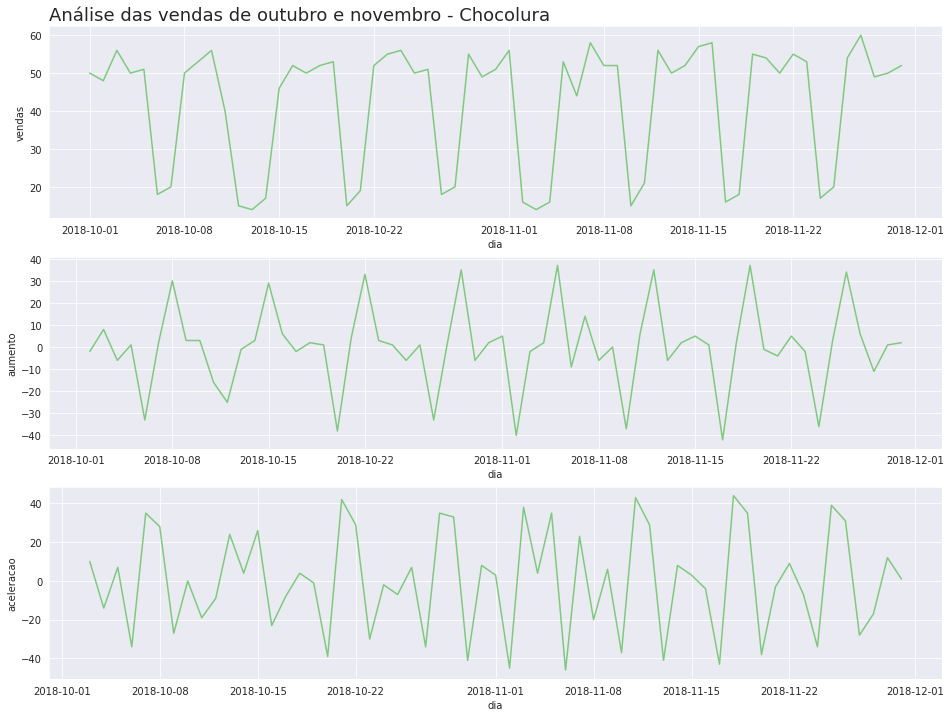

In [44]:
# Plot de comparação:

plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',vendas_por_dia, 'Análise das vendas de outubro e novembro - Chocolura')

### Analisando a Sazonalidade:

In [45]:
# Criando coluna nova:

vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [46]:
# Traduzindo para portugues:

vendas_por_dia['dia_da_semana'].unique()
dias_traduzidos = {'Monday': 'Segunda-Feira', 'Tuesday': 'Terça-Feira', 'Wednesday': 'Quarta-Feira',
		   'Thursday': 'Quinta-Feira', 'Friday': 'Sexta-Feira', 'Saturday': 'Sábado',
		   'Sunday': 'Domingo'}
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-Feira
1,2018-10-02,48,-2.0,NaN,Terça-Feira
2,2018-10-03,56,8.0,10.0,Quarta-Feira
3,2018-10-04,50,-6.0,-14.0,Quinta-Feira
4,2018-10-05,51,1.0,7.0,Sexta-Feira
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda-Feira
8,2018-10-09,53,3.0,-27.0,Terça-Feira
9,2018-10-10,56,3.0,0.0,Quarta-Feira


#### Aparentemente, em dias não úteis (feriados, sábados e domingos), as vendas caem. 

#### Confirmando:

In [47]:
# Agrupando os dias:

vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta-Feira,53.0,1.0,2.0
Quinta-Feira,51.0,-2.0,-3.0
Segunda-Feira,52.0,34.0,31.0
Sexta-Feira,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça-Feira,52.0,-1.0,-34.0
